Define a function and its derivative.

<Axes: >

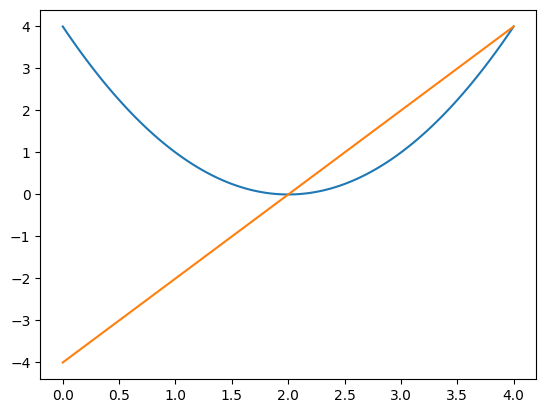

In [21]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
t=np.linspace(0,4,100)
x=torch.tensor(t,requires_grad=True)
y=torch.pow((x-2),2)
s=sum(y)
s.backward()
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=x.grad.detach().numpy())




The Autograd can only apply to scalar functions, that garantees that a parameter in the network can only have a scalar as gradient. That is what I was missing on my implementation of the gradient computations. With that the tensor a.grad has same dimensions as the tensor a.  

In [22]:
A = torch.tensor([[1.0, 2.0],[3.0,4.0]],requires_grad=True)
c = torch.tensor([1.,2.])
b=torch.matmul(A,c)
s1=sum(b)
s1.backward()

print(A.grad)
print(c.data)
print(A[0,1])

tensor([[1., 2.],
        [1., 2.]])
tensor([1., 2.])
tensor(2., grad_fn=<SelectBackward0>)


First Conjugate Gradient

In [23]:
def conjGradient(x,f,cauchy=0.0001,eta=0.1):
    xprev=x.detach().clone()+10
    xcur=x.detach().clone()
    while (torch.linalg.norm(xcur-xprev) > cauchy):
        xprev=xcur
        y=f(x)
        y.backward()
        x.data -= eta*x.grad
        x.grad.zero_()
        xcur=x.detach().clone()
        
def f(x):
    return torch.pow(x-2,2)
x=torch.tensor([6.0],requires_grad=True)
conjGradient(x,f,0.0001,0.1)


In [24]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

D,r=fetch_openml('mnist_784',as_frame=False,version=1,return_X_y=True)

class SimpleDataset(Dataset):

    def __init__(self,X,y):
        super().__init__()
        self.X=X
        self.y=y
    def __getitem__(self,index):
        inputs=torch.tensor(self.X[index,:],dtype=torch.float32)
        targets=torch.tensor(int(self.y[index]),dtype=torch.int64)
        return inputs,targets
    def __len__(self):
        return self.X.shape[0]
    



<class 'str'>
(70000,)
<class 'torch.Tensor'>


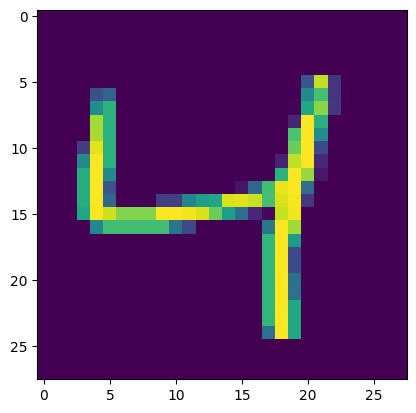

: 

In [ ]:
dataset= SimpleDataset(D,r)
print(type(r[2]))
print(r.shape)
example,label=dataset[2]
print(type(example))
plt.imshow(example.reshape(28,28))